5.2.A

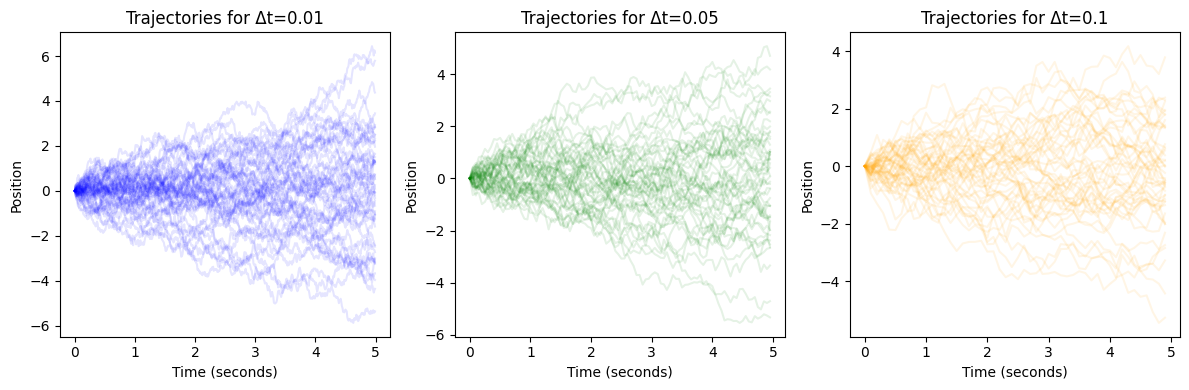

In [6]:
import numpy as np
import matplotlib.pyplot as plt


sample_size = 50
DeltaT_values = [0.01, 0.05, 0.1]
colors = ['blue', 'green', 'orange']


def simulate_diffusion(sample_size, DeltaT):
    steps = int(5 / DeltaT)
    trajectories = np.zeros((sample_size, steps))
    values =np.zeros((sample_size, steps))

    for j in range(sample_size):
        position = 0 

        for i in range(1, steps):
            w= np.random.normal(0, 1)
            position = position + w*np.sqrt(DeltaT)
            trajectories[j, i] = position
            values[j,i]= w


    return trajectories

plt.figure(figsize=(12, 4))

for i, dt in enumerate(DeltaT_values):
    plt.subplot(1, 3, i + 1)
    trajectories = simulate_diffusion(sample_size, dt)
    
    
    for traj in trajectories:
        # print(traj.shape[0])
        plt.plot(np.arange(traj.shape[0]) * dt, traj, alpha=0.1, color=colors[i])

    plt.title(f'Trajectories for Δt={dt}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Position')

plt.tight_layout()
plt.show()



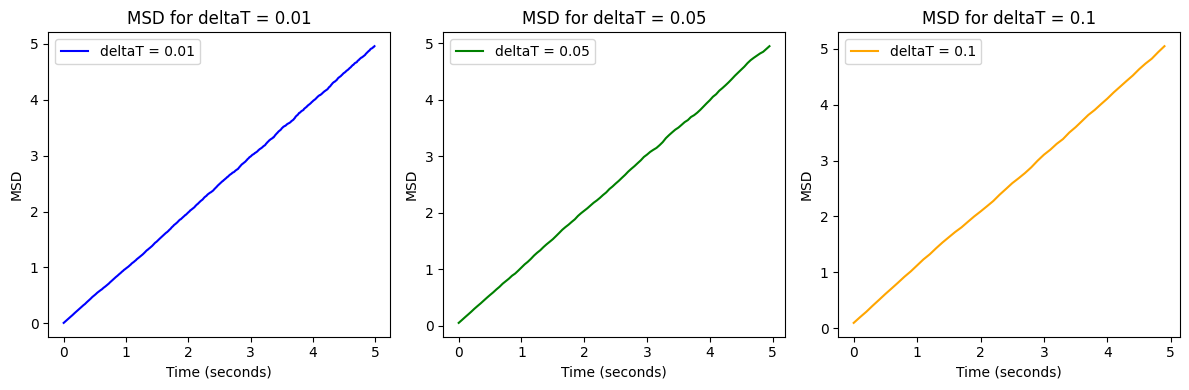

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
t = 5  # No of timesteps
dt_values = [0.01, 0.05, 0.1]
cases = ['deltaT = 0.01', 'deltaT = 0.05', 'deltaT = 0.1']
colors = ['blue', 'green', 'orange']

# Generate Trajectories and Calculate MSD
msd_values = []

for dt in dt_values:
    T = int(t / dt)
    r = np.sqrt(dt) * np.random.randn(T, N)
    r = np.sqrt(dt) * np.random.normal(0,1, size=(T, N))
    x = np.cumsum(r, axis=0)
    msd = np.mean(x**2, axis=1)
    msd_values.append(msd)

# Plotting MSD for each case in a single row
plt.figure(figsize=(12, 4))

for i, (msd, case) in enumerate(zip(msd_values, cases), 1):
    plt.subplot(1, len(dt_values), i)
    plt.plot(np.arange(0, t, dt_values[i-1])[:len(msd)], msd, 
             label=case, color= colors[i-1])
    plt.title(f'MSD for {case}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('MSD')
    plt.legend()

plt.tight_layout()
plt.show()
